# 01 -- Digits MNIST - NumPy

## Victor Jose Novaes Pires

### 2019-03-15

[https://victorjnpires.github.io/](https://victorjnpires.github.io/)

## Setup

In [1]:
%matplotlib inline

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

## Versions

In [2]:
from sys import version

print(version)

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


In [3]:
from tqdm import __version__

print(f"tqdm version: {__version__}")

tqdm version: 4.31.1


In [4]:
from keras import __version__

print(f"Keras version: {__version__}")

Using TensorFlow backend.


Keras version: 2.2.4


In [5]:
from numpy import __version__

print(f"NumPy version: {__version__}")

NumPy version: 1.16.2


In [6]:
from pandas import __version__

print(f"Pandas version: {__version__}")

Pandas version: 0.24.2


In [7]:
from seaborn import __version__

print(f"Seaborn version: {__version__}")

Seaborn version: 0.9.0


In [8]:
from matplotlib import __version__

print(f"Matplotlib version: {__version__}")

Matplotlib version: 3.0.3


In [9]:
from NNfromScratch import __version__

print(f"Neural Networks from Scratch version: {__version__}")

Neural Networks from Scratch version: 1.0.1


## Digits MNIST dataset

In [10]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
import numpy as np

classes = np.unique(y_train)

classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Flattening

In [12]:
X_train = np.asarray([X.flatten() for X in X_train])

X_train.shape

(60000, 784)

In [13]:
X_test = np.asarray([X.flatten() for X in X_test])

X_test.shape

(10000, 784)

In [14]:
y_train = y_train.reshape(-1, 1)

y_train.shape

(60000, 1)

In [15]:
y_test = y_test.reshape(-1, 1)

y_test.shape

(10000, 1)

### Feature scaling

In [16]:
X_min = min(X_train.min(), X_test.min())

X_train.min(), X_test.min(), X_min

(0, 0, 0)

In [17]:
X_max = max(X_test.max(), X_train.max())

X_test.max(), X_train.max(), X_max

(255, 255, 255)

In [18]:
X_train = (X_train - X_min)/X_max

X_test = (X_test - X_min)/X_max

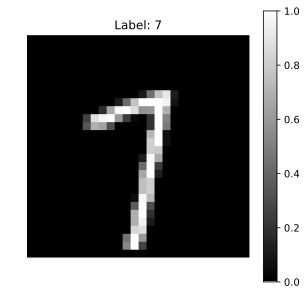

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5, 5])
plt.imshow(X_train[42].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[42][0]}")
plt.axis('off')
plt.colorbar()
plt.show()

In [20]:
seed = 42
np.random.seed(seed)

indices = np.random.choice(len(X_train), size=49, replace=False)

indices

array([12628, 37730, 39991,  8525,  8279, 51012, 14871, 15127,  9366,
       33322, 53390, 21819,  5026, 23428, 45297, 26354, 30195, 47038,
       20731, 34047, 26064, 42469, 29746, 14522, 31572, 54949, 19368,
        3803, 53325, 14300, 51301,  9008, 47521, 25224, 48921, 37978,
       44171, 26303, 19458,  5369, 50291, 25951, 54908, 56362, 32218,
        2885, 36559,  8966, 46574])

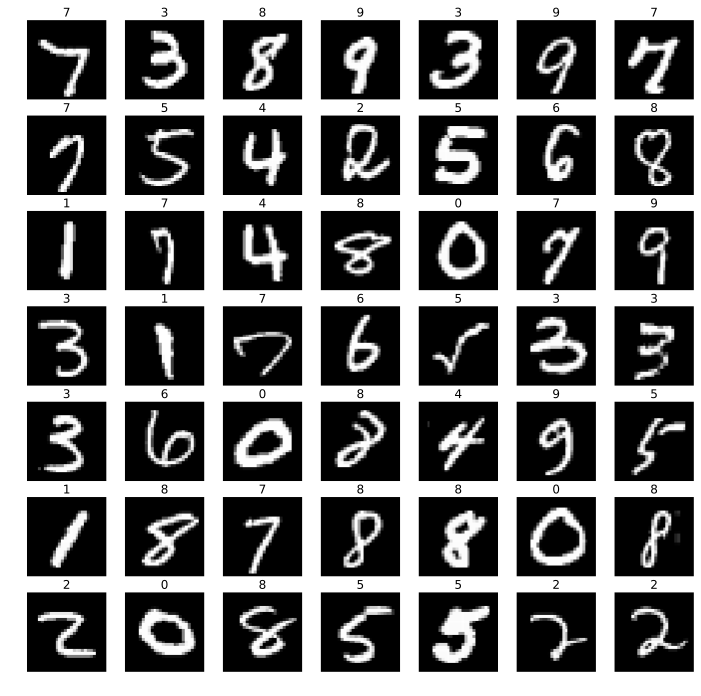

In [21]:
fig, ax_arr = plt.subplots(nrows=7, ncols=7, figsize=[12, 12])

for i, ax in enumerate(ax_arr.reshape(-1)):
    ax.imshow(X_train[indices[i]].reshape(28, 28), cmap='gray')
    ax.set_title(y_train[indices[i]][0], y=0.97)
    ax.set_axis_off()

### Distribution of labels

In [22]:
import pandas as pd

df = pd.DataFrame(data=np.bincount(y_train.reshape(-1)), columns=['Y Train'])

df['Y Test'] = np.bincount(y_test.reshape(-1))

df['Y Combined'] = df['Y Train'] + df['Y Test']

df.index.set_names('Labels', inplace=True)

df

,Y Train,Y Test,Y Combined
Labels,,,
0,5923,980,6903
1,6742,1135,7877
2,5958,1032,6990
3,6131,1010,7141
4,5842,982,6824
5,5421,892,6313
6,5918,958,6876
7,6265,1028,7293
8,5851,974,6825


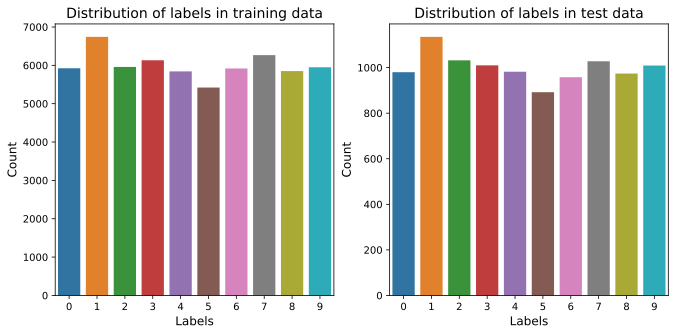

In [23]:
import seaborn as sns

plt.figure(figsize=(11, 5))

plt.subplot(121)
sns.barplot(data=df[['Y Train']].T)
plt.title("Distribution of labels in training data", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(122)
sns.barplot(data=df[['Y Test']].T)
plt.title("Distribution of labels in test data", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

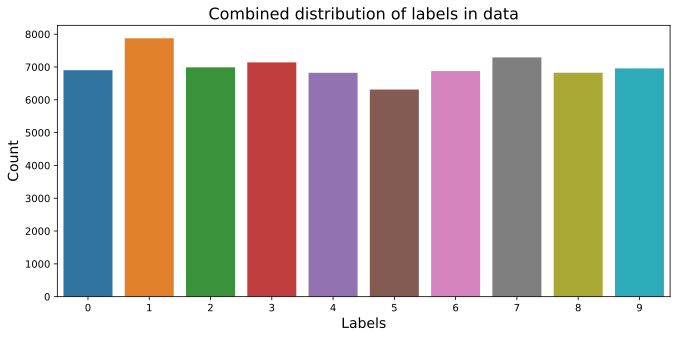

In [24]:
plt.figure(figsize=[11, 5])
sns.barplot(x=classes, y=np.bincount(np.concatenate([y_train.reshape(-1), y_test.reshape(-1)])));
plt.title("Combined distribution of labels in data", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

## Random initialization

$$ \epsilon_{init} = \frac{\sqrt{6}}{\sqrt{L_{in} + L_{out}}} $$

Where $L_{in}$ is the number of rows and $L_{out}$ the number of columns.

In [25]:
hidden_layer_size = 25

import NNfromScratch as nnfs

# First hidden layer
Θ1 = nnfs.random_initializer([hidden_layer_size, (X_train.shape[1] + 1)], seed=seed)

Θ1.shape

(25, 785)

In [26]:
# Second hidden layer
Θ2 = nnfs.random_initializer([len(classes), (hidden_layer_size + 1)], seed=seed)

Θ2.shape

(10, 26)

In [27]:
# To plot values later
Θ1_start, Θ2_start = np.copy(Θ1), np.copy(Θ2)

## Sigmoid function

$$ g(z) = \frac{1}{1 + e^{-z}} $$

## Sigmoid function gradient

$$ g^\prime(z) = \frac{d}{dz} g(z) = g(z)(1 - g(z)) $$

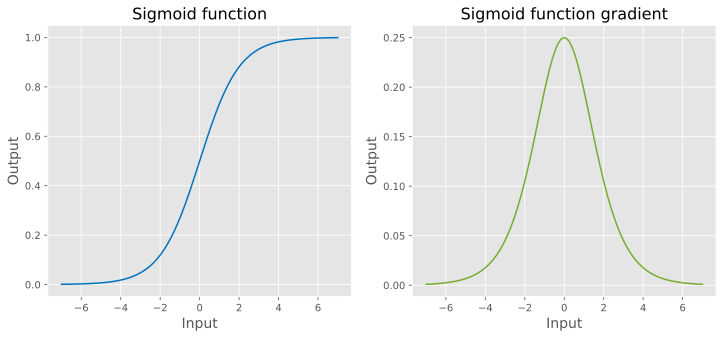

In [28]:
z = np.arange(-7, 7.1, .1)

blue = [0.0000, 0.4470, 0.7410]
green = [0.4660, 0.6740, 0.1880]

plt.figure(figsize=[12, 5])
plt.style.use('ggplot')

plt.subplot(1, 2, 1)
plt.plot(z, nnfs.sigmoid(z), color=blue)
plt.title('Sigmoid function', fontsize=16)
plt.xlabel('Input', fontsize=14)
plt.ylabel('Output', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(z, nnfs.sigmoid_gradient(z), color=green)
plt.title('Sigmoid function gradient', fontsize=16)
plt.xlabel('Input', fontsize=14)
plt.ylabel('Output', fontsize=14)

plt.show()

## Feedforward

### Input layer activation

$$ a^{(1)} = X $$

### Hidden layer activity

$$ z^{(2)} = \Theta^{(1)} a^{(1)} $$

### Hidden layer activation

$$ a^{(2)} = g(z^{(2)}) $$

### Output layer activity

$$ z^{(3)} = \Theta^{(2)} a^{(2)} $$

### Output layer activation

$$ a^{(3)} = g(z^{(3)}) = h_{\theta} (x) $$

In [29]:
a3, a2, z2, a1 = nnfs.feedforward(X_train, Θ1, Θ2)

a1.shape, z2.shape, a2.shape, a3.shape

((60000, 785), (25, 60000), (26, 60000), (10, 60000))

## Cost function

$$ J(\theta) = \frac{1}{m} \sum_{i = 1}^{m} \sum_{k = 1}^{K}
[ - y_{k}^{(i)} \log{((h_\theta(x^{(i)}))_k) - (1- y_{k}^{(i)})} \log{(1 -(h_\theta(x^{(i)}))_k)} ] +
\frac {\lambda}{2 m}
[ \sum_{j = 1} \sum_{k = 1} (\Theta^{(1)}_{j,k})^2 + \sum_{j = 1} \sum_{k = 1} (\Theta^{(2)}_{j,k})^2 ]
$$

In [30]:
# Regularization
λ = 1

J = nnfs.cost(X_train, y_train, Θ1, Θ2, λ)

print(f"Cost: {J:,.2f}")

Cost: 6.87


## Gradient

### Output layer error term

$$ \delta_{k}^{(3)} = (a_{k}^{(3)} - y_k) $$

### Hidden layer error term

$$ \delta_{k}^{(2)} = (\Theta^{(2)})^{(T)} \delta_{k}^{(3)} .* g^{\prime}(z^{(2)}) $$

### Gradient accumulator

$$ \Delta^{(l)} = \Delta^{(l)} \delta^{(l + 1)} (a^{(l)})^{T} $$

### Regularized gradient

$$
\frac{\partial}{\partial \Theta^{(l)}_{i j}} J(\Theta)=
D^{(l)}_{i j} =
\frac{1}{m} \Delta^{(l)}_{i j} + \frac{\lambda}{m} \Theta^{(l)}_{i j} +
\quad \text{for j > 0}
$$

In [31]:
D1, D2 = nnfs.gradient(X_train, y_train, Θ1, Θ2, λ)

D1.shape, D2.shape

((25, 785), (10, 26))

In [32]:
D1.shape == Θ1.shape, D2.shape == Θ2.shape

(True, True)

## Gradient descent

### Backpropagation

$$
\Theta^{(l)}_{i j} = \Theta^{(l)}_{i j} - \alpha \frac{\partial}{\partial \Theta^{(l)}_{i j}} J(\Theta)
$$

In [33]:
%%time

from tqdm import tqdm

# Learning rate
α = 0.1

J = [nnfs.cost(X_train, y_train, Θ1, Θ2, λ)]

iterations = [0]

for i in tqdm(range(100_001)):
    indices = np.random.choice(len(X_train), size=1_000, replace=False)

    # Regularized gradient
    D1, D2 = nnfs.gradient(X_train[indices], y_train[indices], Θ1, Θ2, λ)

    # Backpropagation
    Θ1 -= α*D1
    Θ2 -= α*D2

    # Cost
    if ((i < 100) or (i%1_000 == 0)):
        iterations.append(i)
        J.append(nnfs.cost(X_train, y_train, Θ1, Θ2, λ))
    
print(f"\nCost started at: {nnfs.cost(X_train, y_train, Θ1_start, Θ2_start, λ):,.2f}",
      f"and after {iterations[-1]:,d} iterations it ended at",
      f"{nnfs.cost(X_train, y_train, Θ1, Θ2, λ):,.2f}.\n")

100%|██████████| 100001/100001 [26:27<00:00, 62.98it/s] 



Cost started at: 6.87 and after 100,000 iterations it ended at 0.45.

CPU times: user 34min, sys: 1min 5s, total: 35min 5s
Wall time: 26min 29s


## Cost

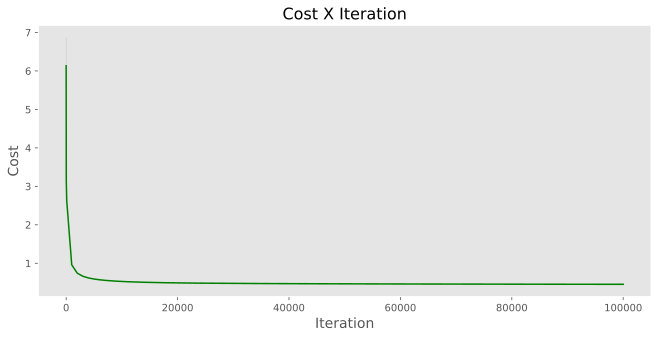

In [34]:
plt.figure(figsize=[11, 5])
sns.lineplot(x=np.asarray(iterations), y=np.asarray(J), color='g')
plt.title("Cost X Iteration", fontsize=16)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.grid()
plt.show()

## Scores

### Training set

In [35]:
p_train = nnfs.predict(X_train, y_train, Θ1, Θ2)

a_train = nnfs.accuracy_score(y_train, p_train)

print(f"Training Set Accuracy: {a_train*100:.2f}%")

Training Set Accuracy: 94.40%


In [36]:
c_train = np.nonzero(p_train == y_train)[0]

print(f"Correctly predicted: {len(c_train):,d} out of {len(y_train):,d} images.")

Correctly predicted: 56,639 out of 60,000 images.


In [37]:
i_train = np.nonzero(p_train != y_train)[0]

print(f"Incorrectly predicted: {len(i_train):,d} out of {len(y_train):,d} images.")

Incorrectly predicted: 3,361 out of 60,000 images.


### Test set

In [38]:
p_test = nnfs.predict(X_test, y_test, Θ1, Θ2)

a_test = nnfs.accuracy_score(y_test, p_test)

print(f"Test Set Accuracy: {a_test*100:.2f}%")

Test Set Accuracy: 94.12%


In [39]:
c_test = np.nonzero(p_test == y_test)[0]

print(f"Correctly predicted: {len(c_test):,d} out of {len(y_test):,d} images.")

Correctly predicted: 9,412 out of 10,000 images.


In [40]:
i_test = np.nonzero(p_test != y_test)[0]

print(f"Incorrectly predicted: {len(i_test):,d} out of {len(y_test):,d} images.")

Incorrectly predicted: 588 out of 10,000 images.


## Distribution of labels

In [41]:
df = pd.DataFrame(data=np.bincount(y_train.reshape(-1)), columns=['Y Train'])
df['Pred Train'] = np.bincount(p_train.reshape(-1))
df['Train Diff'] = df['Pred Train'] - df['Y Train']
df['Y Test'] = np.bincount(y_test.reshape(-1))
df['Pred Test'] = np.bincount(p_test.reshape(-1))
df['Test Diff'] = df['Pred Test'] - df['Y Test']
df['Y Combined'] = df['Y Train'] + df['Y Test']
df['Pred Combined'] = df['Pred Train'] + df['Pred Test']
df['Combined Diff'] = df['Pred Combined'] - df['Y Combined']
df.index.set_names('Labels', inplace=True)
df

,Y Train,Pred Train,Train Diff,Y Test,Pred Test,Test Diff,Y Combined,Pred Combined,Combined Diff
Labels,,,,,,,,,
0,5923,6029,106,980,1014,34,6903,7043,140
1,6742,6899,157,1135,1160,25,7877,8059,182
2,5958,5808,-150,1032,1002,-30,6990,6810,-180
3,6131,5932,-199,1010,1006,-4,7141,6938,-203
4,5842,5944,102,982,1001,19,6824,6945,121
5,5421,5398,-23,892,863,-29,6313,6261,-52
6,5918,6009,91,958,978,20,6876,6987,111
7,6265,6267,2,1028,1011,-17,7293,7278,-15
8,5851,5816,-35,974,972,-2,6825,6788,-37


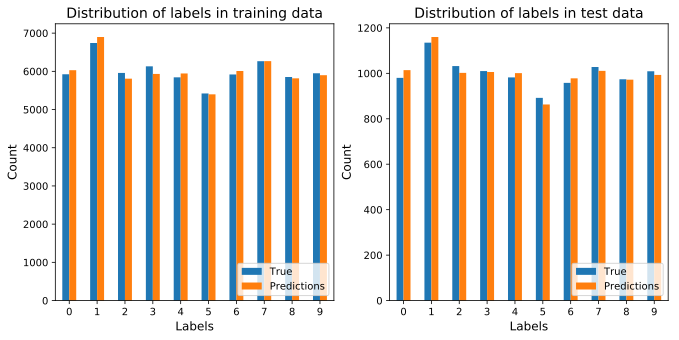

In [42]:
plt.style.use('default')

fig, axes = plt.subplots(figsize=(11, 5), nrows=1, ncols=2)

df[['Y Train', 'Pred Train']].plot.bar(ax=axes[0], rot=0)
axes[0].set_title("Distribution of labels in training data", fontsize=14)
axes[0].set_xlabel("Labels", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].legend(['True', 'Predictions'], loc='lower right')

df[['Y Test', 'Pred Test']].plot.bar(ax=axes[1], rot=0)
axes[1].set_title("Distribution of labels in test data", fontsize=14)
axes[1].set_xlabel("Labels", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].legend(['True', 'Predictions'], loc='lower right')

plt.show()

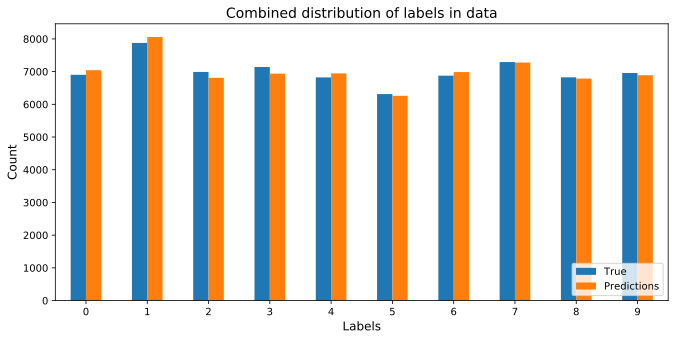

In [43]:
df[['Y Combined', 'Pred Combined']].plot.bar(figsize=(11, 5), rot=0)
plt.title("Combined distribution of labels in data", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(['True', 'Predictions'], loc='lower right')
plt.show()

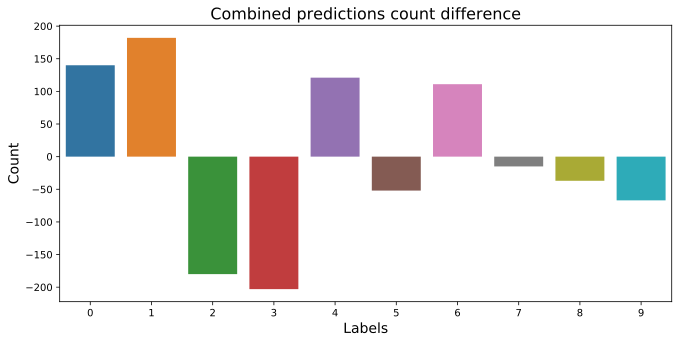

In [44]:
plt.figure(figsize=[11, 5])
sns.barplot(data=df[['Combined Diff']].T)
plt.title("Combined predictions count difference", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

## Correctly classified images

In [45]:
def plot_images(X, y, p, num_rc, indices, cmap='gray'):
    fig, ax_arr = plt.subplots(nrows=num_rc, ncols=num_rc, figsize=[12, 12])
    for i, ax in enumerate(ax_arr.reshape(-1)):
        ax.imshow(X[indices[i]].reshape(28, 28), cmap=cmap)
        ax.set_title(f"True: {y[indices[i]][0]} | Pred: {p[indices[i]][0]}", fontsize=12)
        ax.set_axis_off()

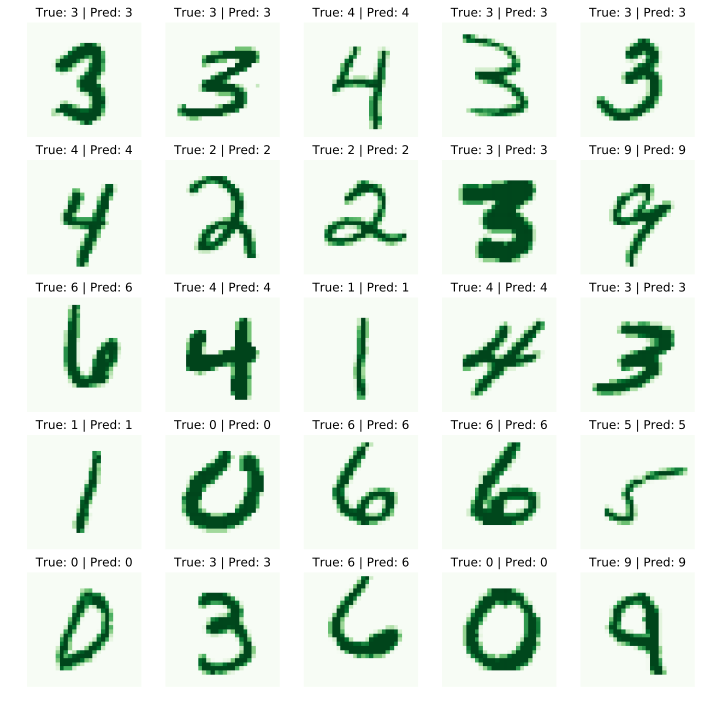

In [46]:
plot_images(X_test,
            y_test,
            p_test,
            5,
            np.random.choice(c_test, size=25, replace=False),
            cmap='Greens')

## Incorrectly classified images

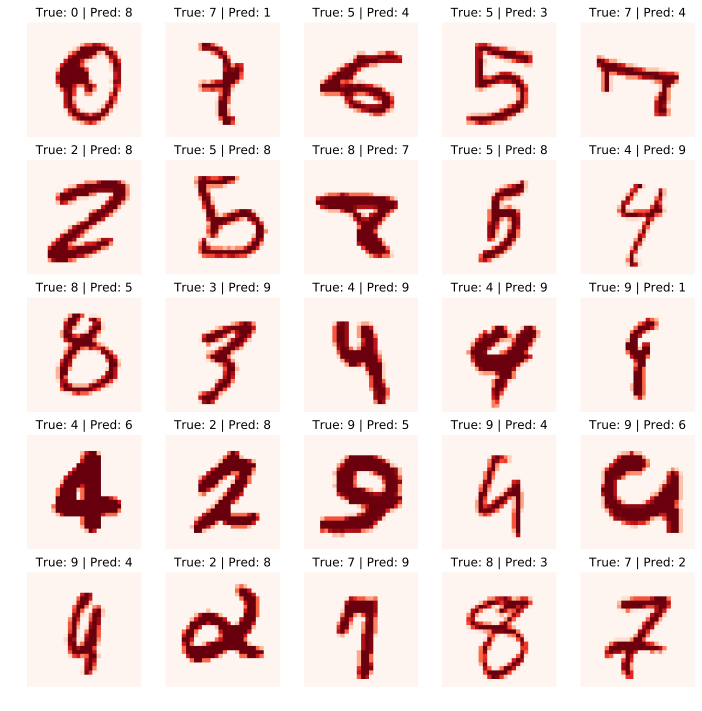

In [47]:
plot_images(X_test,
            y_test,
            p_test,
            5,
            np.random.choice(i_test, size=25, replace=False),
            cmap='Reds')

## Hidden layers weights visualization

### First hidden layer

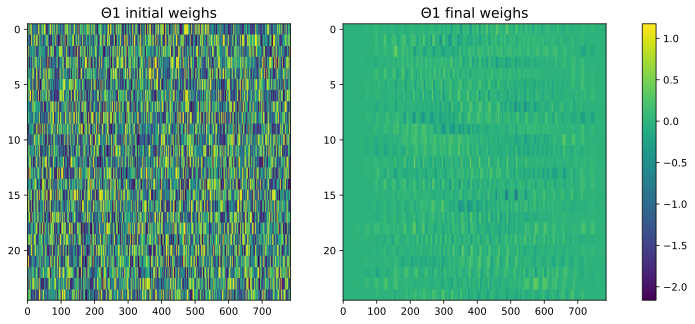

In [48]:
def plot_weights(weights, name):
    fig, ax_arr = plt.subplots(1,2, figsize=[13, 5])
    for ax, w, state, i in zip(ax_arr, weights, ['initial', 'final'], [1, 2]):
        last = ax.imshow(w, cmap='viridis', aspect='auto')
        ax.set_title(f"{name} {state} weighs", fontsize=14)
        ax.grid(False)
    fig.colorbar(last, ax=list(ax_arr))
    plt.show()


plot_weights([Θ1_start, Θ1], 'Θ1')

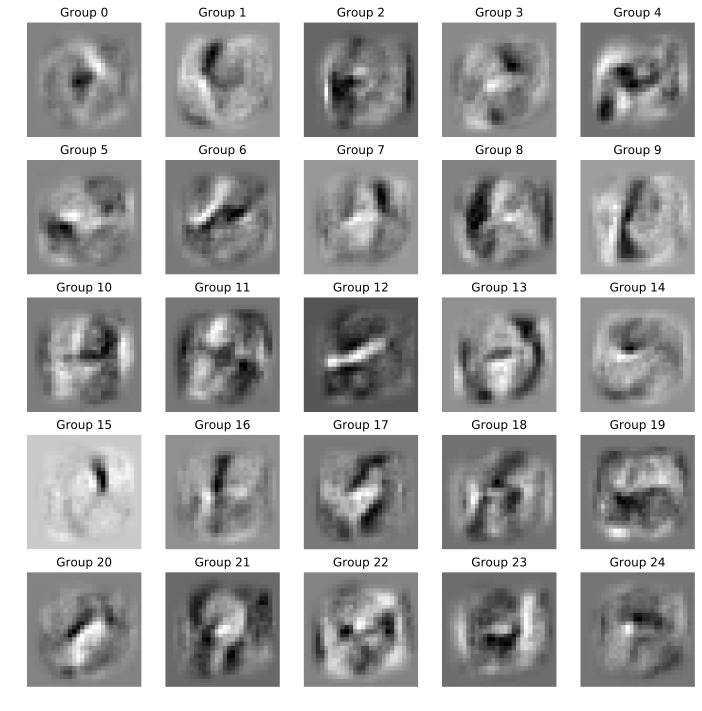

In [49]:
def plot_groups(Θ, group_size, num_groups):
    Θv = [Θ[:, 1:][i].reshape(group_size, group_size).T for i in range(num_groups)]
    num_rc = int(np.sqrt(num_groups))
    fig, ax_arr = plt.subplots(nrows=num_rc, ncols=num_rc, figsize=[12, 12])
    for i, ax in enumerate(ax_arr.reshape(-1)):
        ax.imshow(Θv[i], cmap='gray')
        ax.set_title(f"Group {i}", fontsize=12)
        ax.set_axis_off()


plot_groups(Θ1, group_size=28, num_groups=hidden_layer_size)

### Second hidden layer

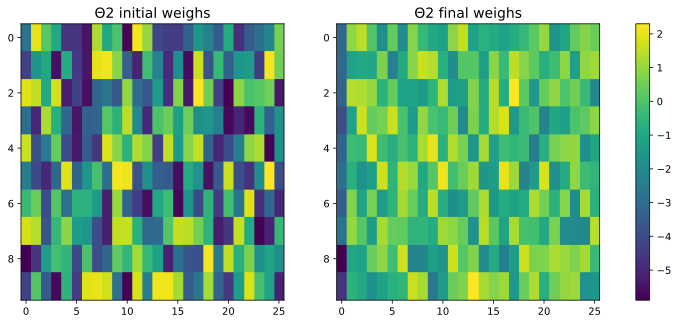

In [50]:
plot_weights([Θ2_start, Θ2], 'Θ2')

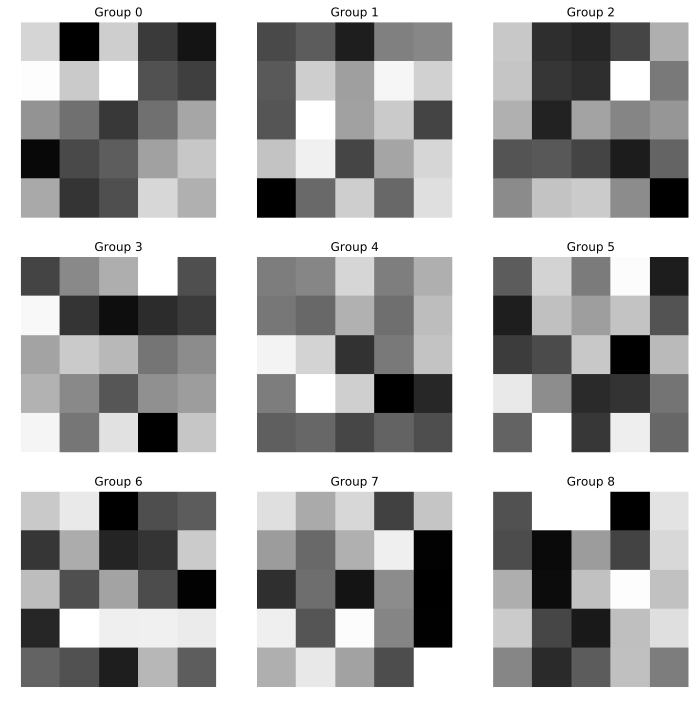

In [51]:
plot_groups(Θ2, group_size=int(np.sqrt(hidden_layer_size)), num_groups=9)